# Create datasets and classifiers

This notebook can be used to create new diamond datasets, new datasets for training the svm, and also for training the svm. It also has code for creating the background spins used in the last step of the code.

In [2]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import time
#import qutip as qt
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
%aimport analysis
%aimport learning
%aimport NV_generator

/Users/juan/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
fig_dir='/Users/juan/Google Drive/Brown/2017S/Machine Learning Applied to Scientific Data  - ENGN2912Z/NV-Tomography/';

In [5]:
logdirs = ['/Users/juan/Google Drive/Zia Lab/Log/']
for i in range(len(logdirs)):
	print(str(i)+'. '+logdirs[i])
print(str(len(logdirs))+'. '+'other')
choicedir = int(input('Choose: '))
if choicedir == len(logdirs):
    while True:
        logdir = input('Enter path:')
        if os.path.isdir(logdir):
            break
        print('Directory does not exist in this computer. Please enter a valid one.')
else:
	logdir = logdirs[choicedir]
if not(os.path.isdir(logdir)):
    print('Directory does not exist in this computer')
	
def loggraph():
	"""Save a graph to the log in Google Drive in both png and pdf formats."""
	timestamp = int(time.time())
	pngfigname = logdir+'graphs/plot'+str(timestamp)+'.png'
	pdffigname = logdir+'graphs/plot'+str(timestamp)+'.pdf'
	print(pngfigname)
	print(pdffigname)
	plt.savefig(pngfigname, dpi=300)
	plt.savefig(pdffigname)
def logdata(description, data):
	"""Save data to a pickle located in the Google Drive log."""
	timestamp = int(time.time())
	picklename = logdir+'data/data'+str(timestamp)+'.pickle'
	pickle.dump([description, data], open(picklename,'wb'))
	print('File saved succesfully to '+picklename+'.')

0. /Users/juan/Google Drive/Zia Lab/Log/
1. other
Choose: 0


In [6]:
B_field = 0.0403555 # Teslas
gam_c = 67.262 * 10 ** 6 # Gyromagnetic ratio for a single c13 nucleus in rad s-1 T-1
ms = 1
omega_larmor = -1 * ms * gam_c * B_field

In [7]:
num_diamonds = 29

In [68]:
if False: # In here one would create new diamond datasets.
    learning.create_diamonds([20], omega_larmor, num_spins = 450)

In [69]:
# This over here imports the diamond datasets.
diamonds = []
for diamond_num in range(num_diamonds):
    print "loading diamond ", diamond_num
    diamond = learning.load_obj_2("diamonds/old_diamonds/diamond_" + str(diamond_num))
    diamonds.append(diamond)
print "diamonds loaded"

loading diamond  0
loading diamond  1
loading diamond  2
loading diamond  3
loading diamond  4
loading diamond  5
loading diamond  6
loading diamond  7
loading diamond  8
loading diamond  9
loading diamond  10
loading diamond  11
loading diamond  12
loading diamond  13
loading diamond  14
loading diamond  15
loading diamond  16
loading diamond  17
loading diamond  18
loading diamond  19
loading diamond  20
loading diamond  21
loading diamond  22
loading diamond  23
loading diamond  24
loading diamond  25
loading diamond  26
loading diamond  27
loading diamond  28
diamonds loaded


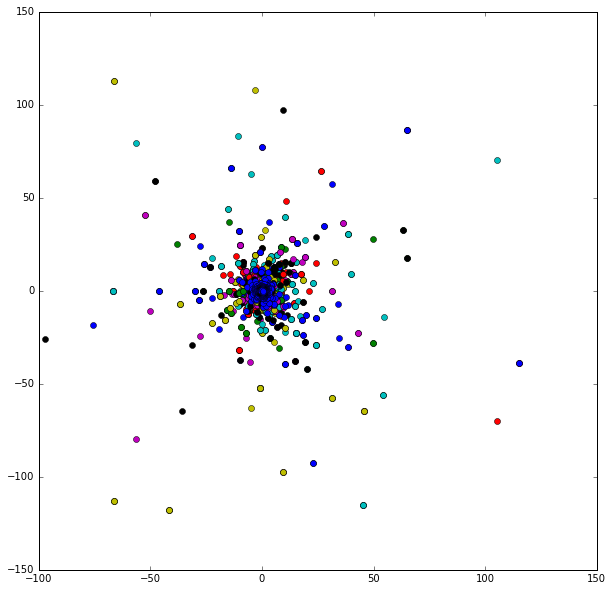

In [70]:
plt.figure(figsize=(10,10))
for counter in range(len(diamonds)):
    plt.plot(diamonds[counter]['A']/analysis.mag,diamonds[counter]['B']/analysis.mag,'o',label=str(counter))
plt.show()

In [53]:
if False:
    from sklearn.externals import joblib 
    # Michael saved diamonds in format that produces lots of ancillary files
    # 12:33:30 11-May-2017, I've decided to use pickle instead
    # In here I convert from the old to the new format
    # The old format is saved in the file old_diamonds.tar.gz
    # The new format is saved in the folder /diamonds/old_diamonds
    for counter_1 in range(29):
        thisdiamond = joblib.load('diamonds/old_diamonds/old_diamonds/diamond_'+str(counter_1)+'.pkl')
        pickle.dump(thisdiamond,open('diamonds/old_diamonds/diamond_'+str(counter_1)+'.pkl','wb'))

In [71]:
# In here the guess dataset is created using the previously
# calculated diamonds.
suffix = "_di3220_29diamonds_cxABe"
if True: # set to True on 09-May-2017 13:11:32
    _ = learning.guess_dataset(diamonds, omega_larmor, pickle = True, training_percent = .5, min_dip_ind = 3220, suffix = suffix)

diamond_ind:  0
diamond_ind:  1
diamond_ind:  2
diamond_ind:  3
diamond_ind:  4
diamond_ind:  5
diamond_ind:  6
diamond_ind:  7
diamond_ind:  8
diamond_ind:  9
diamond_ind:  10
diamond_ind:  11
diamond_ind:  12
diamond_ind:  13
diamond_ind:  14
diamond_ind:  15
diamond_ind:  16
diamond_ind:  17
diamond_ind:  18
diamond_ind:  19
diamond_ind:  20
diamond_ind:  21
diamond_ind:  22
diamond_ind:  23
diamond_ind:  24
diamond_ind:  25
diamond_ind:  26
diamond_ind:  27
diamond_ind:  28
create dataset
store dataset


In [126]:
# In here the classifier is trained
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(dataset["train_X"], 
                                     dataset["train_Y"], 
                                     dataset["test_X"], 
                                     dataset["test_Y"],
                                 kernel='rbf', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.930437895239
testing score:  0.917556599744


In [127]:
from sklearn.metrics import confusion_matrix

In [131]:
#confusion matrix
cf_matrix=confusion_matrix(dataset["test_Y"],clf.predict(scaler.transform(dataset["test_X"])),labels=[0,1])
#true negatives
print("bad spins identified as bad ones",cf_matrix[0,0])
#false negatives
print("good spins identified as bad ones",cf_matrix[1,0])
# true positives
print("good spins identified as good ones",cf_matrix[1,1])
# false positives
print("bad spins identified as good ones",cf_matrix[0,1])

('bad spins identified as bad ones', 5585)
('good spins identified as bad ones', 298)
('good spins identified as good ones', 859)
('bad spins identified as good ones', 281)


In [206]:
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
#np.savetxt('datasets/guess_dataset_xtrain-2.csv',xtrain,delimiter=',')
#np.savetxt('datasets/guess_dataset_ytrain-2.csv',ytrain,delimiter=',')
#np.savetxt('datasets/guess_dataset_xtest-2.csv',xtest,delimiter=',')
#np.savetxt('datasets/guess_dataset_ytest-2.csv',ytest,delimiter=',')

In [132]:
# Total number of samples in all diamonds.
sum(map(lambda x: len(x['A']), diamonds))

13754

In [208]:
print("-"*25)
print("Training set")
print("-"*25)
print("Good spins = " + str(sum(ytrain==1))+" ("+str(int(100.*sum(ytrain==1)/float(len(xtrain))))+"%)")
print("Bad spins  = " + str(sum(ytrain==0))+" ("+str(int(100.*sum(ytrain==0)/float(len(xtrain))))+"%)")
print("-"*25)
print("total      = "+str(len(xtrain)))
print("-"*25)
print("-"*25)
print("Test set")
print("-"*25)
print("Good spins = " + str(sum(ytest==1))+" ("+str(int(100.*sum(ytest==1)/float(len(xtest))))+"%)")
print("Bad spins  = " + str(sum(ytest==0))+" ("+str(int(100.*sum(ytest==0)/float(len(xtest))))+"%)")
print("-"*25)
print("total      = "+str(len(xtest)))
print("-"*25)

-------------------------
Training set
-------------------------
Good spins = 1419 (16%)
Bad spins  = 6962 (83%)
-------------------------
total      = 8381
-------------------------
-------------------------
Test set
-------------------------
Good spins = 1157 (16%)
Bad spins  = 5866 (83%)
-------------------------
total      = 7023
-------------------------


In [228]:
# Let's change the feature vector and see what happens
# Keep only A and B
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
#(A,B)
#xtrain=np.array(zip(xtrain[:,2],xtrain[:,3]))
#xtest=np.array(zip(xtest[:,2],xtest[:,3]))
#(A,epsilon)
xtrain=np.array(zip(xtrain[:,3],xtrain[:,-1]))
xtest=np.array(zip(xtest[:,3],xtest[:,-1]))
if True:
    print "train svm"
    scaler, clf = learning.train_svm(xtrain, ytrain, xtest, ytest,
                                 kernel='linear', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.830688461997
testing score:  0.83525558878


In [229]:
A_test=np.linspace(-150.*analysis.mag,150.*analysis.mag,100)
B_test=np.linspace(0,150*analysis.mag,100)
B_test=np.linspace(600,1600.,100)
XX, YY = np.meshgrid(A_test,B_test)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

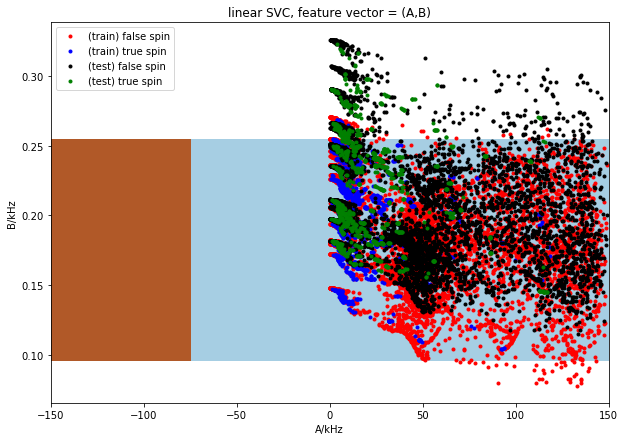

In [230]:
plt.figure(figsize=(10,7))
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,0][ytrain==0],1./2/np.pi*10**(-3)*xtrain[:,1][ytrain==0],'ro',label='(train) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,0][ytrain==1],1./2/np.pi*10**(-3)*xtrain[:,1][ytrain==1],'bo',label='(train) true spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,0][ytest==0],1./2/np.pi*10**(-3)*xtest[:,1][ytest==0],'ko',label='(test) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,0][ytest==1],1./2/np.pi*10**(-3)*xtest[:,1][ytest==1],'go',label='(test) true spin',ms=3)
plt.pcolormesh(XX/analysis.mag,YY/analysis.mag,Z>0, cmap=plt.cm.Paired)
plt.legend()
plt.xlabel('A/kHz')
plt.ylabel('B/kHz')
plt.title('linear SVC, feature vector = (A,B)')
plt.show()

In [8]:
import itertools

In [9]:
pairs_of_vars_indices=list(itertools.combinations(range(5),2))
names_of_vars=['cos(phi)','x','A','B','error']

In [10]:
# load the dataset
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])

cos(phi) vs x
cos(phi) vs A
cos(phi) vs B
cos(phi) vs error
x vs A
x vs B
x vs error
A vs B
scaled
A vs error
scaled
B vs error
scaled


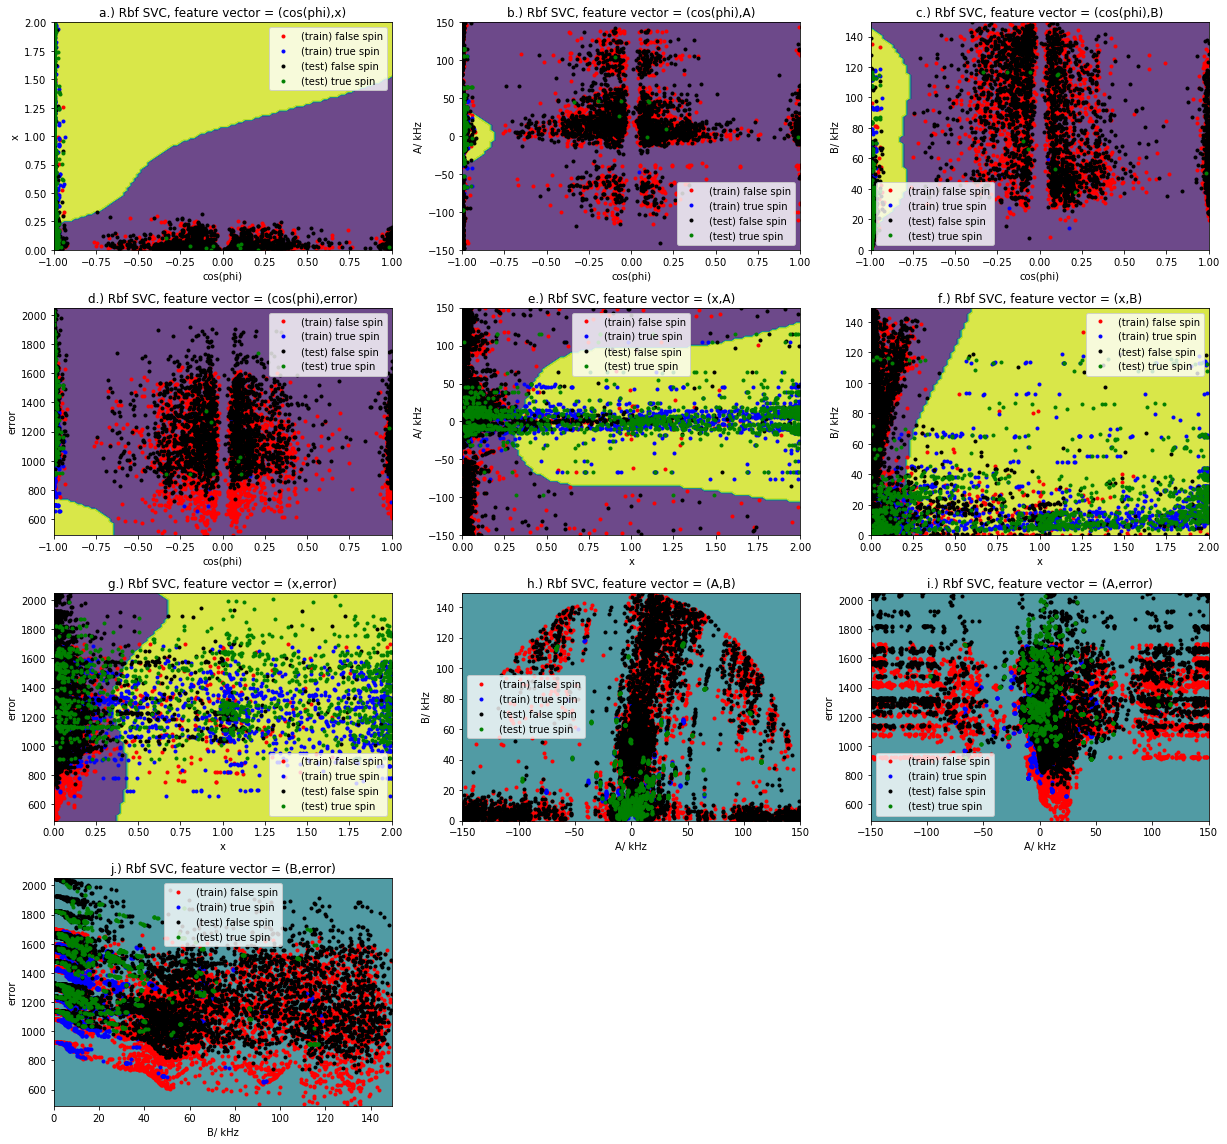

In [26]:
panel_index=1
plt.figure(figsize=(30/1.75,28/1.75))
counter = 1
for pair in pairs_of_vars_indices:
    if counter == 4:
        break
    #counter +=1
    print(names_of_vars[pair[0]]+" vs "+names_of_vars[pair[1]])
    # Choose the feature vector and the test
    this_xtrain=np.array(zip(xtrain[:,pair[0]],xtrain[:,pair[1]]))
    this_xtest=np.array(zip(xtest[:,pair[0]],xtest[:,pair[1]]))
    # Train the SVC
    scaler, clf = learning.train_svm(this_xtrain, ytrain, this_xtest, ytest,
                                 kernel='rbf', verbose = False, pickle = False, suffix = suffix)
    # Make a plot of the decision boundary
    this_x_min = min(xtrain[:,pair[0]].min(),xtest[:,pair[0]].min())
    this_x_max = max(xtrain[:,pair[0]].max(),xtest[:,pair[0]].max())
    this_y_min = min(xtrain[:,pair[1]].min(),xtest[:,pair[1]].min())
    this_y_max = max(xtrain[:,pair[1]].max(),xtest[:,pair[1]].max())
    this_xx_test=np.linspace(this_x_min,this_x_max,100)
    this_xy_test=np.linspace(this_y_min,this_y_max,100)
    XX, YY = np.meshgrid(this_xx_test,this_xy_test)
    Z = clf.decision_function(scaler.transform(np.c_[XX.ravel(), YY.ravel()]))
    Z = Z.reshape(XX.shape)
    plt.subplot(4,3,panel_index)
    scale_factor_x = 1
    scale_factor_y = 1
    unit_name_x = ''
    unit_name_y = ''
    if (names_of_vars[pair[0]] == 'A') or (names_of_vars[pair[0]] == 'B'):
        scale_factor_x = 1. / analysis.mag
        unit_name_x = '/ kHz'
        print('scaled')
    if (names_of_vars[pair[1]] == 'A') or (names_of_vars[pair[1]] == 'B'):
        scale_factor_y = 1. / analysis.mag
        unit_name_y = '/ kHz'
    plt.plot(this_xtrain[:,0][ytrain==0]*scale_factor_x,this_xtrain[:,1][ytrain==0]*scale_factor_y,'ro',label='(train) false spin',ms=3)
    plt.plot(this_xtrain[:,0][ytrain==1]*scale_factor_x,this_xtrain[:,1][ytrain==1]*scale_factor_y,'bo',label='(train) true spin',ms=3)
    plt.plot(this_xtest[:,0][ytest==0]*scale_factor_x,this_xtest[:,1][ytest==0]*scale_factor_y,'ko',label='(test) false spin',ms=3)
    plt.plot(this_xtest[:,0][ytest==1]*scale_factor_x,this_xtest[:,1][ytest==1]*scale_factor_y,'go',label='(test) true spin',ms=3)
    #plt.pcolormesh(XX,YY,Z>0, cmap=plt.cm.Paired)
    plt.contourf(XX*scale_factor_x,YY*scale_factor_y,Z>0,alpha=0.8)
    plt.legend()
    plt.xlabel(names_of_vars[pair[0]]+unit_name_x)
    plt.ylabel(names_of_vars[pair[1]]+unit_name_y)
    plt.title(chr(96+panel_index)+'.) Rbf SVC, feature vector = '+'('+names_of_vars[pair[0]]+","+names_of_vars[pair[1]]+")")
    panel_index+=1
plt.tight_layout()
plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.pdf')
plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.png',dpi=100)
plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.jpg',dpi=100)
plt.show()

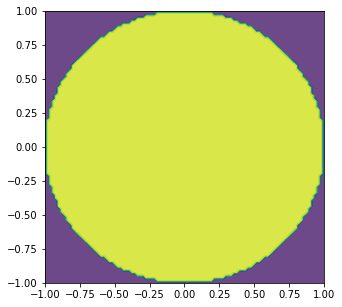

In [28]:
XXp, YYp = np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
plt.figure(figsize=(5,5))
plt.contourf(XXp,YYp,(XXp**2+YYp**2)<1.,alpha=0.8)
plt.show()

In [48]:
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
# If one simply uses (A,B) as the feature vector, then all the spins are rejected as false spins
panel_index=1
#plt.figure(figsize=(10,7))
pair = pairs_of_vars_indices[7]
print(names_of_vars[pair[0]]+" vs "+names_of_vars[pair[1]])
# Choose the feature vector and the test
this_xtrain=np.array(zip(xtrain[:,pair[0]],xtrain[:,pair[1]]))
this_xtest=np.array(zip(xtest[:,pair[0]],xtest[:,pair[1]]))
# Train the SVC
parameters = dict(svc__C=[10000,50000,100000])
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
grid_search = GridSearchCV(pipe, param_grid=parameters)
grid_search.fit(this_xtrain,ytrain)
this_x_min = min(xtrain[:,pair[0]].min(),xtest[:,pair[0]].min())
this_x_max = max(xtrain[:,pair[0]].max(),xtest[:,pair[0]].max())
this_y_min = min(xtrain[:,pair[1]].min(),xtest[:,pair[1]].min())
this_y_max = max(xtrain[:,pair[1]].max(),xtest[:,pair[1]].max())
this_xx_test=np.linspace(this_x_min,this_x_max,400)
this_xy_test=np.linspace(this_y_min,this_y_max,400)

A vs B


In [82]:
grid_search.best_params_

{'svc__C': 100000}

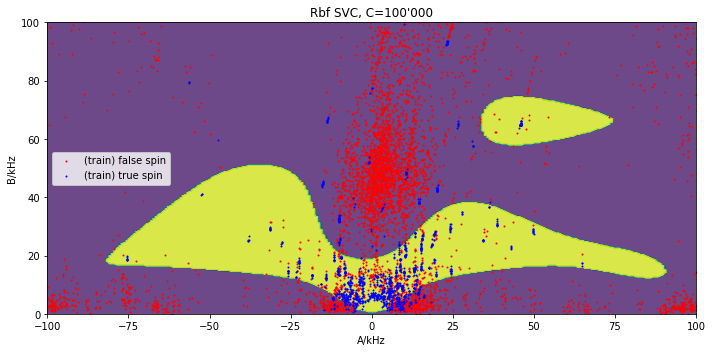

In [84]:
plt.figure(figsize=(10,5))
# Make a plot of the decision boundary
XX, YY = np.meshgrid(this_xx_test,this_xy_test)
Z = grid_search.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
#print(clf.score(x_test,y_test))
#Z = clf.decision_function(scaler.transform(np.c_[XX.ravel(), YY.ravel()]))
#Z = Z.reshape(XX.shape)

#plt.plot(this_xtest[:,0][ytest==0]/analysis.mag,this_xtest[:,1][ytest==0]/analysis.mag,'ko',label='(test) false spin',ms=3)
#plt.plot(this_xtest[:,0][ytest==1]/analysis.mag,this_xtest[:,1][ytest==1]/analysis.mag,'go',label='(test) true spin',ms=3)
#plt.pcolormesh(XX/analysis.mag,YY/analysis.mag,Z>0, cmap=plt.cm.Paired)
plt.contourf(XX/analysis.mag,YY/analysis.mag,Z>=0,alpha=0.8)
plt.scatter(this_xtrain[:,0][ytrain==0]/analysis.mag,this_xtrain[:,1][ytrain==0]/analysis.mag,color='red',s=4,lw=0,label='(train) false spin')
plt.scatter(this_xtrain[:,0][ytrain==1]/analysis.mag,this_xtrain[:,1][ytrain==1]/analysis.mag,color='blue',s=4,lw=0,label='(train) true spin')
plt.legend()
plt.xlabel(names_of_vars[pair[0]]+'/kHz')
plt.ylabel(names_of_vars[pair[1]]+'/kHz')
plt.xlim(-100,100)
plt.ylim(0,100)
plt.title('Rbf SVC, C=100\'000')
panel_index+=1
plt.tight_layout()
plt.savefig(fig_dir+'A_B_rbf_SVC.pdf')
plt.savefig(fig_dir+'A_B_rbf_SVC.png',dpi=100)
plt.savefig(fig_dir+'A_B_rbf_SVC.jpg',dpi=100)
plt.show()

In [181]:
#confusion matrix
# everything is identified as bad
cf_matrix=confusion_matrix(ytrain,clf.predict(scaler.transform(this_xtrain)),labels=[0,1])
#true negatives
print("bad spins identified as bad ones",cf_matrix[0,0])
#false negatives
print("good spins identified as bad ones",cf_matrix[1,0])
# true positives
print("good spins identified as good ones",cf_matrix[1,1])
# false positives
print("bad spins identified as good ones",cf_matrix[0,1])

('bad spins identified as bad ones', 6962)
('good spins identified as bad ones', 1419)
('good spins identified as good ones', 0)
('bad spins identified as good ones', 0)


## Projection of the decision boundary in the (A,B) plane (undetermined)


In [182]:
# In here the classifier is trained
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(dataset["train_X"], 
                                     dataset["train_Y"], 
                                     dataset["test_X"], 
                                     dataset["test_Y"],
                                 kernel='rbf', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.930437895239
testing score:  0.917556599744


In [198]:
for counter in range(5):
    print(np.mean(np.array(dataset["train_X"])[:,counter]))

-0.377486305013
0.213506460086
53275.3477778
267935.457485
1177.17541151


array([[ -3.70000000e-01,   2.10000000e-01,  -9.42224591e+05,
          1.16978340e-01,   1.10000000e+03],
       [ -3.70000000e-01,   2.10000000e-01,  -9.23190763e+05,
          1.16978340e-01,   1.10000000e+03],
       [ -3.70000000e-01,   2.10000000e-01,  -9.04156935e+05,
          1.16978340e-01,   1.10000000e+03],
       ..., 
       [ -3.70000000e-01,   2.10000000e-01,   9.04056751e+05,
          9.37932879e+05,   1.10000000e+03],
       [ -3.70000000e-01,   2.10000000e-01,   9.23090580e+05,
          9.37932879e+05,   1.10000000e+03],
       [ -3.70000000e-01,   2.10000000e-01,   9.42124408e+05,
          9.37932879e+05,   1.10000000e+03]])

In [203]:
this_xx_test[0]

-942224.59118754463

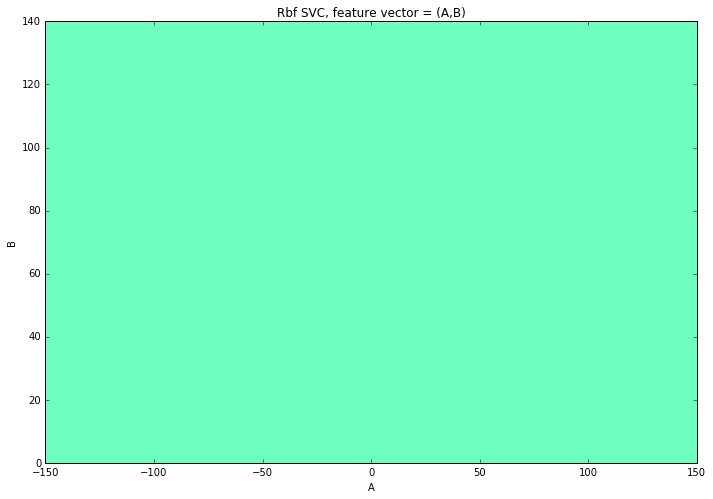

In [204]:
plt.figure(figsize=(10,7))
this_xx_test=np.linspace(-150*analysis.mag,150*analysis.mag,100)
this_xy_test=np.linspace(0,140.*analysis.mag,100)
# Make a plot of the decision boundary
XX, YY = np.meshgrid(this_xx_test,this_xy_test)
Z = clf.decision_function(scaler.transform(np.c_[-0.37+np.zeros(10000),0.21+np.zeros(10000),XX.ravel(), YY.ravel(),40.+np.zeros(10000)]))
Z = Z.reshape(XX.shape)
#plt.plot(this_xtrain[:,0][ytrain==0]/analysis.mag,this_xtrain[:,1][ytrain==0]/analysis.mag,'ro',label='(train) false spin',ms=3)
#plt.plot(this_xtrain[:,0][ytrain==1]/analysis.mag,this_xtrain[:,1][ytrain==1]/analysis.mag,'bo',label='(train) true spin',ms=3)
#plt.plot(this_xtest[:,0][ytest==0]/analysis.mag,this_xtest[:,1][ytest==0]/analysis.mag,'ko',label='(test) false spin',ms=3)
#plt.plot(this_xtest[:,0][ytest==1]/analysis.mag,this_xtest[:,1][ytest==1]/analysis.mag,'go',label='(test) true spin',ms=3)
#plt.pcolormesh(XX/analysis.mag,YY/analysis.mag,Z>0, cmap=plt.cm.Paired)
plt.contourf(XX/analysis.mag,YY/analysis.mag,Z>=0,alpha=0.8)
plt.legend()
plt.xlabel(names_of_vars[pair[0]])
plt.ylabel(names_of_vars[pair[1]])
plt.title('Rbf SVC, feature vector = '+'('+names_of_vars[pair[0]]+","+names_of_vars[pair[1]]+")")
plt.tight_layout()
#plt.colorbar()
#plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.pdf')
#plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.png',dpi=100)
#plt.savefig(fig_dir+'pairs_of_vars_comparison_rbf_SVC.jpg',dpi=100)
plt.show()

## Plot of the confusion matrix


In [205]:
# In here the classifier is trained
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(dataset["train_X"], 
                                     dataset["train_Y"], 
                                     dataset["test_X"], 
                                     dataset["test_Y"],
                                 kernel='rbf', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.930437895239
testing score:  0.917556599744


In [271]:
len(true_negatives)+len(true_positives)+len(false_negatives)+len(false_positives)

14046

In [272]:
len(dataset["test_X"])

7023

In [285]:
predictions = clf.predict(scaler.transform(dataset["test_X"]))
true_values = dataset['test_Y']
true_negatives=[]
true_positives = []
false_positives=[]
false_negatives=[]
for counter in range(len(predictions)):
    if predictions[counter] == 0 and true_values[counter] == 0:
        true_negatives.append(dataset["test_X"][counter])
    if predictions[counter] == 0 and true_values[counter] == 1:
        false_negatives.append(dataset["test_X"][counter])
    if predictions[counter] == 1 and true_values[counter] == 0:
        false_positives.append(dataset["test_X"][counter])
    if predictions[counter] == 1 and true_values[counter] == 1:
        true_positives.append(dataset["test_X"][counter])
true_negatives=np.array(true_negatives)
true_positives = np.array(true_positives)
false_positives=np.array(false_positives)
false_negatives=np.array(false_negatives)
print(len(true_negatives))
print(len(false_negatives))
print(len(false_positives))
print(len(true_positives))

5585
298
281
859


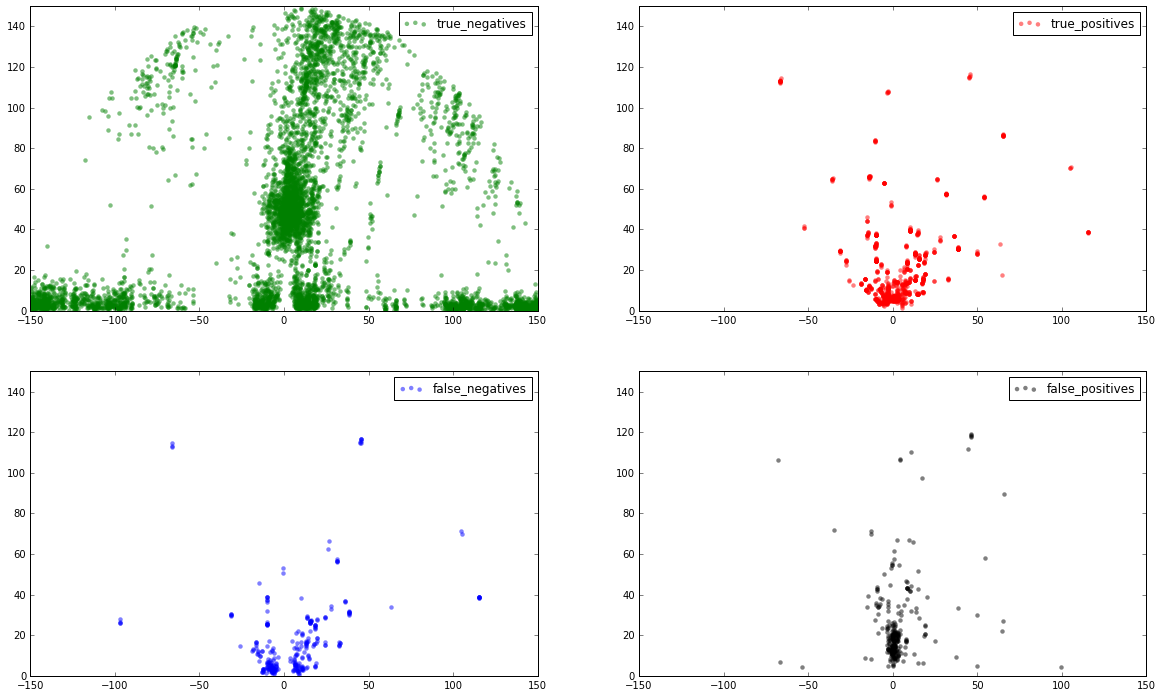

In [286]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.scatter(true_negatives[:,2]/analysis.mag,true_negatives[:,3]/analysis.mag,label='true_negatives',c='green',alpha=0.5,lw=0)
plt.legend()
plt.xlim(-150,150)
plt.ylim(0,150)
plt.subplot(2,2,2)
plt.scatter(true_positives[:,2]/analysis.mag,true_positives[:,3]/analysis.mag,label='true_positives',c='red',alpha=0.5,lw=0)
plt.legend()
plt.xlim(-150,150)
plt.ylim(0,150)
plt.subplot(2,2,3)
plt.scatter(false_negatives[:,2]/analysis.mag,false_negatives[:,3]/analysis.mag,label='false_negatives',c='blue',alpha=0.5,lw=0)
plt.legend()
plt.xlim(-150,150)
plt.ylim(0,150)
plt.subplot(2,2,4)
plt.scatter(false_positives[:,2]/analysis.mag,false_positives[:,3]/analysis.mag,label='false_positives',c='black',alpha=0.5,lw=0)
plt.legend()
plt.xlim(-150,150)
plt.ylim(0,150)
plt.show()

## Bias in the train and test sets

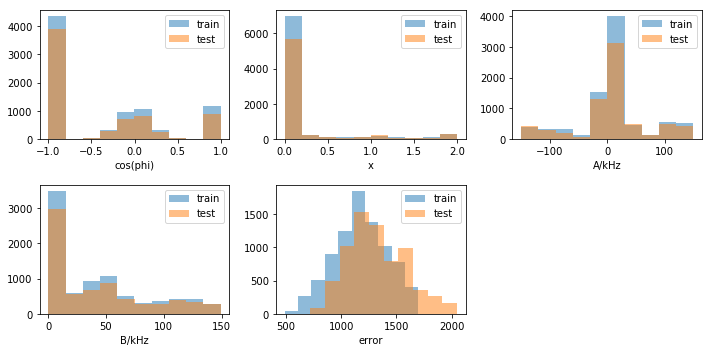

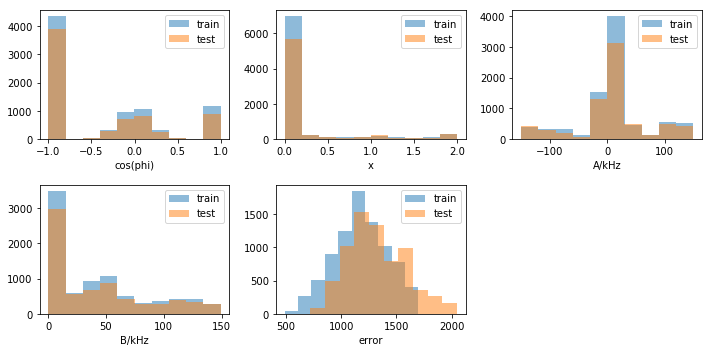

In [320]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,3,i+1)
    var_name=names_of_vars[i]
    if var_name == 'A' or var_name == 'B':
        scale=analysis.mag
    else:
        scale=1
    plt.hist(xtrain[:,i]/scale,label='train',alpha=0.5)
    plt.hist(xtest[:,i]/scale,label='test',alpha=0.5)
    plt.legend()
    if var_name == 'A' or var_name == 'B':
        plt.xlabel(var_name+"/kHz")
    else:
        plt.xlabel(var_name)
plt.tight_layout()
plt.savefig(fig_dir+'train_vs_test_histograms.pdf')
plt.savefig(fig_dir+'train_vs_test_histograms.png',dpi=300)
plt.show()

In [113]:
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
np.savetxt('datasets/guess_dataset_xtrain.csv',xtrain,delimiter=',')
np.savetxt('datasets/guess_dataset_ytrain.csv',ytrain,delimiter=',')
np.savetxt('datasets/guess_dataset_xtest.csv',xtest,delimiter=',')
np.savetxt('datasets/guess_dataset_ytest.csv',ytest,delimiter=',')

/Users/juan/Google Drive/Zia Lab/Log/graphs/plot1493764122.png
/Users/juan/Google Drive/Zia Lab/Log/graphs/plot1493764122.pdf


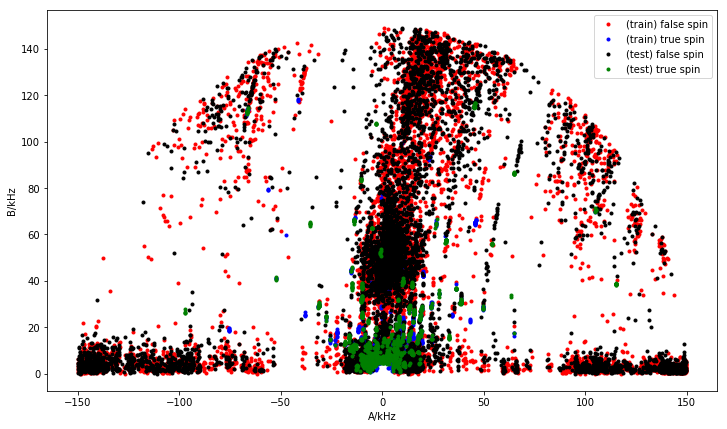

In [114]:
plt.figure(figsize=(12,7))
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,2][ytrain==0],1./2/np.pi*10**(-3)*xtrain[:,3][ytrain==0],'ro',label='(train) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,2][ytrain==1],1./2/np.pi*10**(-3)*xtrain[:,3][ytrain==1],'bo',label='(train) true spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,2][ytest==0],1./2/np.pi*10**(-3)*xtest[:,3][ytest==0],'ko',label='(test) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,2][ytest==1],1./2/np.pi*10**(-3)*xtest[:,3][ytest==1],'go',label='(test) true spin',ms=3)
plt.legend()
plt.xlabel('A/kHz')
plt.ylabel('B/kHz')
#loggraph()
plt.show()

In [7]:
clf.coef_, clf.intercept_

(array([[-0.36175828,  0.95493479,  0.00244094,  0.03401229, -0.02430468]]),
 array([-0.94027893]))

In [26]:
A_background = 4 * analysis.mag * (np.random.rand(400) - .5)
B_background = 2 * analysis.mag * (np.random.rand(400))
background_dict = {"A_background" : A_background, "B_background" : B_background}
if False:
    learning.store_obj(background_dict, "background_A_B")

## Stuff

In [5]:
diccionario = {}
diccionario[(1,2,'hey')] = 2

In [9]:
type(diccionario.keys()[0])

tuple

In [ ]:
learning.is_fit()

In [16]:
if (1,2,'hoy') in diccionario:
    print(True)
else:
    print(False)

False


In [6]:
print(diccionario)

{(1, 2, 'hey'): 2}


In [ ]:
# %load learning.py
# NV-spin-tomography Michael Scheer mgscheer@gmail.com

# Creating datasets and training classifiers, storing objects on disk

import numpy as np
import sklearn as sk
from sklearn import svm, preprocessing, cross_validation, cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.externals import joblib
import analysis
import NV_generator

# store an object in a file
def store_obj(obj, fname):
	joblib.dump(obj, fname + ".pkl")

# load an object from a file
def load_obj(fname):
	return joblib.load(fname + ".pkl")

# decides if a fitted A and B are close enough to a spin to be counted as a fit.
# the B tends to be harder to fit so the accuracy demanded is less.
def is_fit(fitted_A, fitted_B, spin, A_acc = .1, B_acc = .5):
	A_acc = analysis.mag * A_acc
	B_acc= analysis.mag * B_acc
	return ((spin[0] >= fitted_A - A_acc) and (spin[0] <= fitted_A + A_acc) and
		(spin[1] >= fitted_B - B_acc) and (spin[1] <= fitted_B + B_acc))

# creates a dataset of diamonds with N measurements already analyzed, saves it to disk
def create_diamonds(diamond_num_list, omega_larmor, num_spins = 450):
	verbose, plots = False, False
	num_subsets = 4
	error_fun = analysis.squared_error
	error_tol = .1/64
	N = 64
	N_vals = np.arange(0, 256, 2)
	tau = analysis.choose_tau_params(N)
	for diamond_num in diamond_num_list:
		print "diamond_num: ", diamond_num
		A, B, r, costheta, sintheta = NV_generator.generate_spins(num_spins)
		def data_func(N, tau, noise_level = .02):
			data = analysis.calc_M(A, B, N, omega_larmor, tau)
			noise = np.random.randn(len(data)) * noise_level
			return data + noise
		data = data_func(N, tau)
		dip_inds, windows = analysis.find_resonances(data, fit_dips_below = None)
		successful_fits, good_fits, phis_list, xs_list, scaled_errors = [], [], [], [], []
		print "number of dips: ", len(dip_inds)
		for dii in range(len(dip_inds)):
			print "dii: ", dii
			dip_ind = dip_inds[dii]
			res_tau = tau[dip_ind]
			N_data = data_func(N_vals, res_tau)
			successful_fit, good_fit = True, True # did the fit succeed without throwing an error? was the error in the fit small enough?
			try:
				phis, xs, scaled_error = analysis.repeated_spin_fit(N_vals, N_data, error_tol = error_tol, error_fun = error_fun,
					num_subsets = num_subsets, verbose = verbose, plots = plots)
				good_fit = scaled_error <= error_tol
			except analysis.FitError:
				successful_fit, good_fit = False, False
				phis, xs = None, None
				scaled_error = None
			successful_fits.append(successful_fit)
			good_fits.append(good_fit)
			phis_list.append(phis)
			xs_list.append(xs)
			scaled_errors.append(scaled_errors)
		print "create diamond_dict"
		diamond_dict = {"A" : A, "B" : B, "r" : r, "costheta" : costheta, "sintheta" : sintheta, "N" : N,
			"tau" : tau, "data" : data, "N_vals" : N_vals, "N_data" : N_data, "dip_inds" : dip_inds, "windows" : windows,
			"successful_fits" : successful_fits, "good_fits" : good_fits, "error_tol" : error_tol, "num_subsets" : num_subsets,
			"phis_list" : phis_list, "xs_list" : xs_list, "scaled_errors" : scaled_errors}
		print "store diamond_dict"
		store_obj(diamond_dict, "diamonds/diamond_" + str(diamond_num))

# train and optionally save a support vector machine classifier
# scaler preprocesses the data (scales it) and clf is the classifier
def train_svm(train_X, train_Y, test_X, test_Y, kernel = 'rbf', C=1.0, verbose = False, pickle = False, suffix = ""):
	scaler = sk.preprocessing.StandardScaler().fit(train_X)
	clf = sk.svm.SVC(kernel = kernel, C=C)# svm with rbf kernel (default)
	clf.fit(scaler.transform(train_X), train_Y)
	if verbose:
		print "training score: ", clf.score(scaler.transform(train_X), train_Y)
		print "testing score: ", clf.score(scaler.transform(test_X), test_Y)
	if pickle:
		store_obj(scaler, "classifiers/scaler_svm_" + kernel + suffix)
		store_obj(clf, "classifiers/clf_svm_" + kernel + suffix)
	return scaler, clf

# train and optionally save an extra-trees classifier
# scaler preprocesses the data (scales it) and clf is the classifier
def train_trees(train_X, train_Y, test_X, test_Y, verbose = False, pickle = False, suffix = ""):
	scaler = sk.preprocessing.StandardScaler().fit(train_X)
	clf = sk.ensemble.ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
	clf.fit(scaler.transform(train_X), train_Y)
	if verbose:
		print "training score: ", clf.score(scaler.transform(train_X), train_Y)
		print "testing score: ", clf.score(scaler.transform(test_X), test_Y)
	if pickle:
		store_obj(scaler, "classifiers/scaler_trees" + suffix)
		store_obj(clf, "classifiers/clf_trees" + suffix)
	return scaler, clf

# creates and optionally saves the dataset used to train the SVM which classifies guesses.
def guess_dataset(diamonds, omega_larmor, min_dip_ind = 3220, training_percent = .75, pickle = False, suffix = ""):
	train_X = [] # feature vectors
	train_Y = [] # classifications
	test_X = []
	test_Y = []
	error_fun = analysis.squared_error
	for diamond_ind in range(len(diamonds)):
		print "diamond_ind: ", diamond_ind
		diamond = diamonds[diamond_ind]
		tau = diamond["tau"]
		data = diamond["data"]
		N = diamond["N"]
		dip_inds = diamond["dip_inds"]
		windows = diamond["windows"]
		spin_dict = {}
		for dii in range(len(dip_inds)):
			if diamond["good_fits"][dii] and dip_inds[dii] >= min_dip_ind:
				dip_ind = dip_inds[dii]
				res_tau = tau[dip_ind]
				for phi, x in zip(diamond["phis_list"][dii], diamond["xs_list"][dii]):
					for omega_tilde, cosphi in analysis.calc_omega_tilde(phi, x, res_tau, omega_larmor):
						A, B = analysis.calc_A_B(cosphi, res_tau, omega_larmor, omega_tilde)
						if analysis.valid_A_B(A, B):
							if (dip_ind, phi, x) in spin_dict:
								spin_dict[(dip_ind, phi, x)] += [(A, B, cosphi)]
							else:
								spin_dict[(dip_ind, phi, x)] = [(A, B, cosphi)]
		for k in spin_dict.keys():
			err = []
			for A, B, _ in spin_dict[k]:
				err.append(error_fun(analysis.calc_M_single(A, B, N, omega_larmor, tau), data))
			min_err_ind = np.argmin(err)
			best_A, best_B, best_cosphi = spin_dict[k][min_err_ind]
			best_err = err[min_err_ind]
			_, _, x = k
			features = [best_cosphi, x, best_A, best_B, best_err]
			tag = 0
			for spin in set(zip(diamond["A"], np.abs(diamond["B"]))):
				if is_fit(best_A, best_B, spin, A_acc = .5, B_acc = 2):
					tag = 1
					break
			if diamond_ind < training_percent * len(diamonds):
				train_X.append(features)
				train_Y.append(tag)
			else:
				test_X.append(features)
				test_Y.append(tag)
	if pickle:
		print "create dataset"
		dataset = {"train_X" : train_X, "train_Y" : train_Y, "test_X" : test_X, "test_Y" : test_Y}
		print "store dataset"
		store_obj(dataset, "datasets/guess_dataset" + suffix)
	return train_X, train_Y, test_X, test_Y

## Comparison with the complete set of (A,B)s

In [360]:
# the values are in kHz
complete_lattice = np.genfromtxt('complete_lattice.csv',delimiter=',');
complete_lattice[:,1] = np.abs(complete_lattice[:,1])

In [361]:
len(complete_lattice)

33532

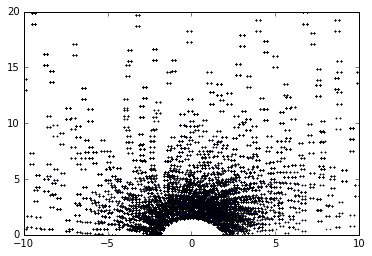

In [327]:
# plot the patch of goodness using the thresholds
# that Michael used
# namely 0.1 kHz for A and 0.5 kHz for B

plt.figure()
plt.plot(partial_lattice[:,0]-0.1,np.abs(partial_lattice[:,1])-0.5,'o',color='blue',ms=1)
plt.plot(partial_lattice[:,0]-0.1,np.abs(partial_lattice[:,1])+0.5,'o',color='blue',ms=1)
plt.plot(partial_lattice[:,0]+0.1,np.abs(partial_lattice[:,1])-0.5,'o',color='blue',ms=1)
plt.plot(partial_lattice[:,0]+0.1,np.abs(partial_lattice[:,1])+0.5,'o',color='blue',ms=1)
plt.xlim(-10,10)
plt.ylim(0,20)
plt.show()

In [411]:
partial_lattice =  complete_lattice[complete_lattice[:,0]**2+complete_lattice[:,1]**2>0.]
bounds = [[[partial_lattice[counter][0]-0.1,partial_lattice[counter][1]-0.5],
         [partial_lattice[counter][0]+0.1,partial_lattice[counter][1]-0.5],
          [partial_lattice[counter][0]+0.1,partial_lattice[counter][1]+0.5],
          [partial_lattice[counter][0]-0.1,partial_lattice[counter][1]+0.5],
          [partial_lattice[counter][0]-0.1,partial_lattice[counter][1]-0.5]] for counter in range(len(partial_lattice))]
bounds=np.array(bounds)

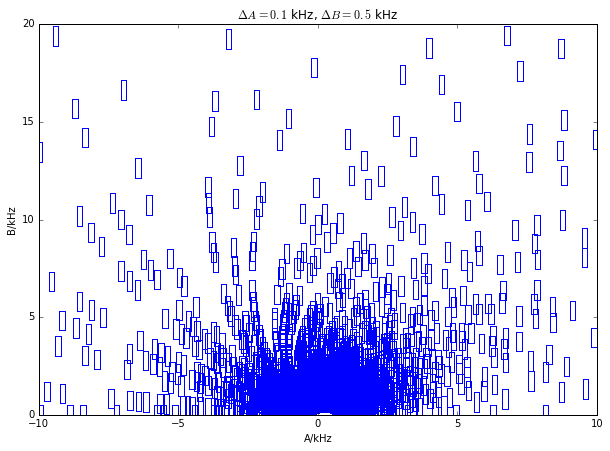

In [428]:
# plot the patch of goodness using the thresholds
# that Michael used
# namely 0.1 kHz for A and 0.5 kHz for B
plt.figure(figsize=(10,7))
for rectangle in bounds:
        plt.plot(rectangle[:,0],rectangle[:,1],'b-')
plt.xlim(-10,10)
plt.ylim(0,20)
plt.xlabel('A/kHz')
plt.ylabel('B/kHz')
plt.title('$\Delta A=0.1$ kHz, $\Delta B=0.5$ kHz')
plt.savefig(fig_dir+'patches.pdf')
plt.savefig(fig_dir+'patches.png',dpi=100)
plt.savefig(fig_dir+'patches.jpg',dpi=100)
plt.show()

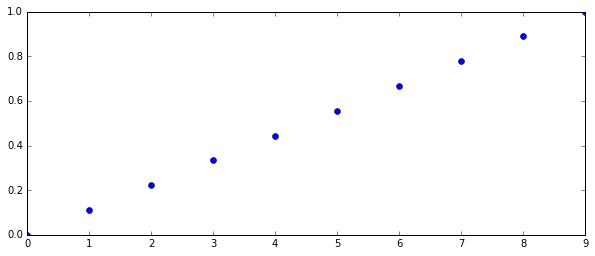

In [433]:
plt.figure(figsize=(10,4))
plt.plot(np.linspace(0,1,10),'o')
plt.show()